###  Helper Function & Import Libraries

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Function to display images in a grid format
def show_images(image_dict, main_title="Point Operators", figsize=(12, 8)):
    """Displays multiple images with matplotlib."""
    plt.figure(figsize=figsize)
    plt.suptitle(main_title, fontsize=16)
    for i, (title, img) in enumerate(image_dict.items()):
        plt.subplot(2, (len(image_dict) + 1) // 2, i + 1)
        plt.title(title)
        if len(img.shape) == 3:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [39]:
# Function to show histograms of grayscale images
def show_histograms(hist_dict, main_title="Histograms", figsize=(10, 4)):
    """Displays grayscale image histograms."""
    plt.figure(figsize=figsize)
    plt.suptitle(main_title, fontsize=16)
    for i, (title, img) in enumerate(hist_dict.items()):
        plt.subplot(1, len(hist_dict), i + 1)
        plt.title(title)
        hist = cv2.calcHist([img], [0], None, [256], [0, 256])
        plt.plot(hist)
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.xlim([0, 256])
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

### ✅ 1. Alpha Compositing

Blends the **foreground** and **background** using an **alpha matte**:

$$
C = \alpha F + (1 - \alpha) B
$$

Where:

- \( C \): Composite image  
- \( \alpha \): Alpha mask (0 = transparent, 255 = opaque)  
- \( F \): Foreground  
- \( B \): Background


In [33]:
def alpha_compositing(foreground_img, background_img, alpha_matte):
    """
    Combines a foreground and background image using an alpha matte.
    Formula: C = αF + (1 - α)B
    """
    # If alpha_matte is already single-channel, just normalize
    alpha = alpha_matte.astype(float) / 255.0
    # Expand alpha to 3 channels
    alpha = np.repeat(alpha[:, :, np.newaxis], 3, axis=2)
    foreground = foreground_img.astype(float)
    background = background_img.astype(float)
    composite = alpha * foreground + (1 - alpha) * background
    composite = np.clip(composite, 0, 255).astype(np.uint8)
    return composite

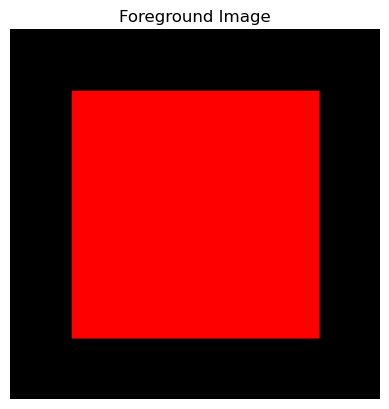

In [34]:
# --- Sample Images ---
foreground = np.zeros((300, 300, 3), dtype=np.uint8)
cv2.rectangle(foreground, (50, 50), (250, 250), (255, 0, 0), -1)

# Foreground image
plt.imshow(foreground)
plt.title('Foreground Image')
plt.axis('off')
plt.show()

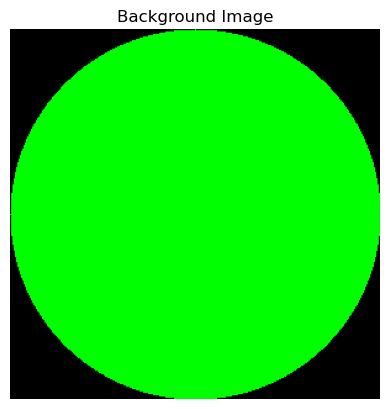

In [35]:
# Background image
background = np.zeros((300, 300, 3), dtype=np.uint8)
cv2.circle(background, (150, 150), 150, (0, 255, 0), -1)

plt.imshow(background)
plt.title('Background Image')
plt.axis('off')
plt.show()

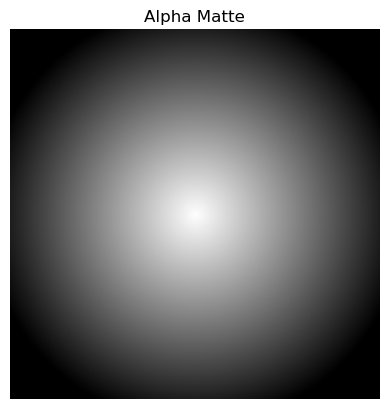

In [36]:
# Center of the circle for alpha matte
center_x, center_y = 150, 150
Y, X = np.ogrid[:300, :300]
dist_from_center = np.sqrt((X - center_x)**2 + (Y - center_y)**2)
alpha_matte = np.clip(255 - dist_from_center * 1.5, 0, 255).astype(np.uint8)

# Display the alpha matte
plt.imshow(alpha_matte, cmap='gray')
plt.title('Alpha Matte')
plt.axis('off')
plt.show()

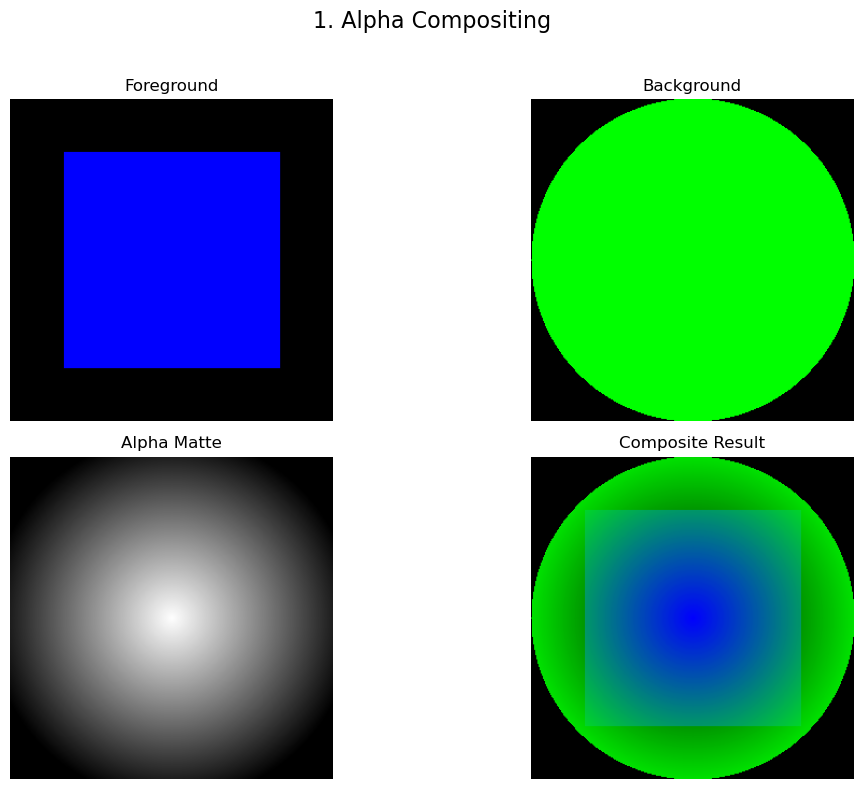

In [37]:
# --- 1. Alpha Compositing ---
composite_result = alpha_compositing(foreground, background, alpha_matte)
show_images({
    "Foreground": foreground,
    "Background": background,
    "Alpha Matte": alpha_matte,
    "Composite Result": composite_result
}, "1. Alpha Compositing")

### ✅ 2. Histogram Equalization

Enhances contrast by redistributing pixel values more evenly across the histogram.  
Ideal for **low-contrast** or **washed-out** images.

- **Before**: Pixel intensities are clustered in a narrow range  
- **After**: Intensities are spread across the full range (0–255), increasing contrast


In [38]:
def histogram_equalization(grayscale_img):
    """Enhances contrast using histogram equalization."""
    return cv2.equalizeHist(grayscale_img)

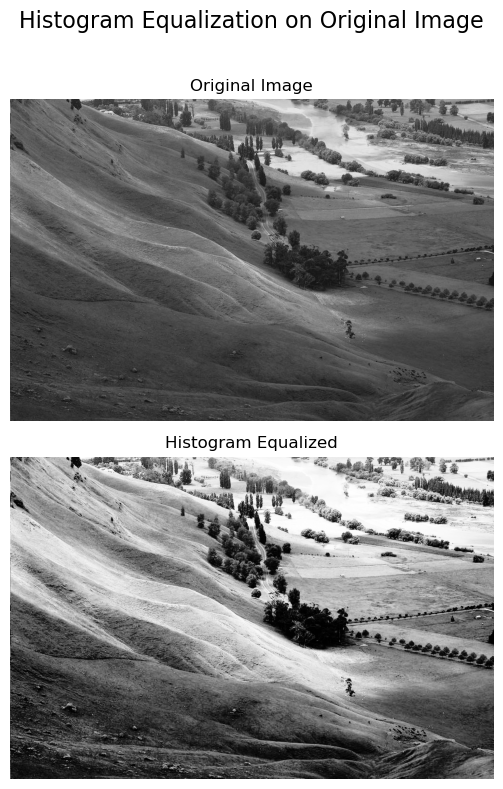

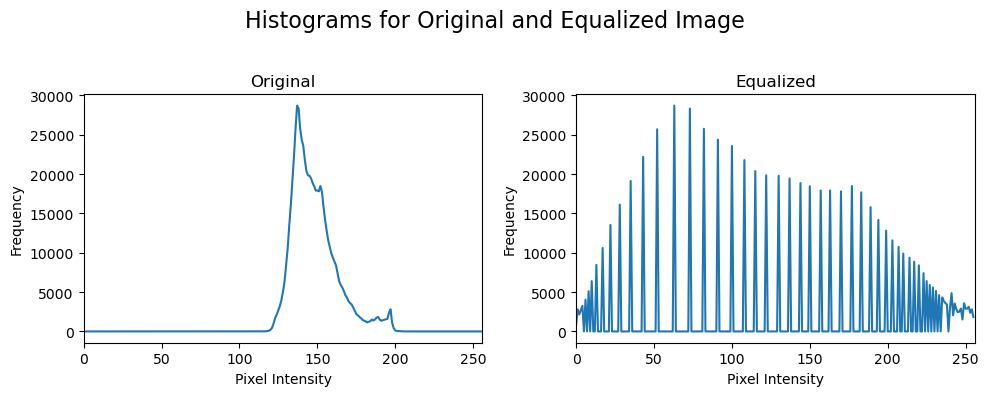

In [42]:
# --- 2. Histogram Equalization ---

# Load your original image in grayscale
org_img = cv2.imread(r'D:\FPT_Material\Sem 4\CPV301\Source for PE\Image\Unequalized_Hawkes_Bay_NZ.jpg', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_img = histogram_equalization(org_img)

# Show original and equalized images
show_images({
    "Original Image": org_img,
    "Histogram Equalized": equalized_img
}, "Histogram Equalization on Original Image")

# Show histograms for both images
show_histograms({
    "Original": org_img,
    "Equalized": equalized_img
}, "Histograms for Original and Equalized Image")

### 3️⃣ Thresholding

#### ✅ 3.1. Simple Thresholding

A fixed threshold value is applied across the entire image:

- If **pixel value > threshold** → set to **max value**
- Else → set to **0**

This is done using the OpenCV function:

```python
cv.threshold(src, thresh, maxval, type)

Where type can be one of the following:

- cv.THRESH_BINARY

- cv.THRESH_BINARY_INV

- cv.THRESH_TRUNC

- cv.THRESH_TOZERO

- cv.THRESH_TOZERO_INV

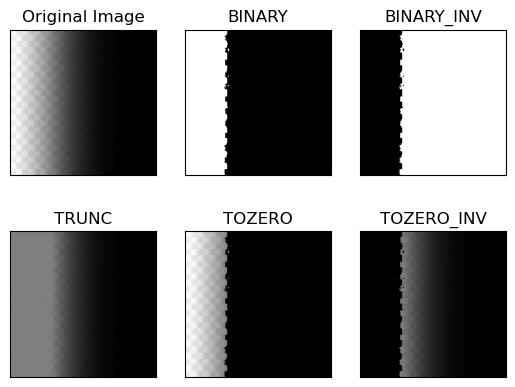

In [49]:
# Load the image for thresholding
img = cv2.imread(r'D:\FPT_Material\Sem 4\CPV301\Source for PE\Image\gradient.png', cv2.IMREAD_GRAYSCALE)
assert img is not None, "Image not found. Please check the path."

# Apply different thresholding techniques
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

# Display the original and thresholded images
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

#### ✅ 2. Adaptive Thresholding

##### 📌 Problem  
A **global threshold** might not work well for images with **non-uniform lighting**.

##### 💡 Solution  
**Adaptive thresholding** calculates the threshold **per pixel**, based on a small neighborhood.

This is done using:

```python
cv.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)

##### 🔧 Parameters

- `adaptiveMethod`:
  - `cv.ADAPTIVE_THRESH_MEAN_C`: Mean of the neighborhood minus constant **C**
  - `cv.ADAPTIVE_THRESH_GAUSSIAN_C`: Weighted Gaussian sum of the neighborhood minus constant **C**

- `blockSize`:  
  Size of the local neighborhood (must be **odd**, e.g., 11, 15)

- `C`:  
  Constant subtracted from the mean or Gaussian sum


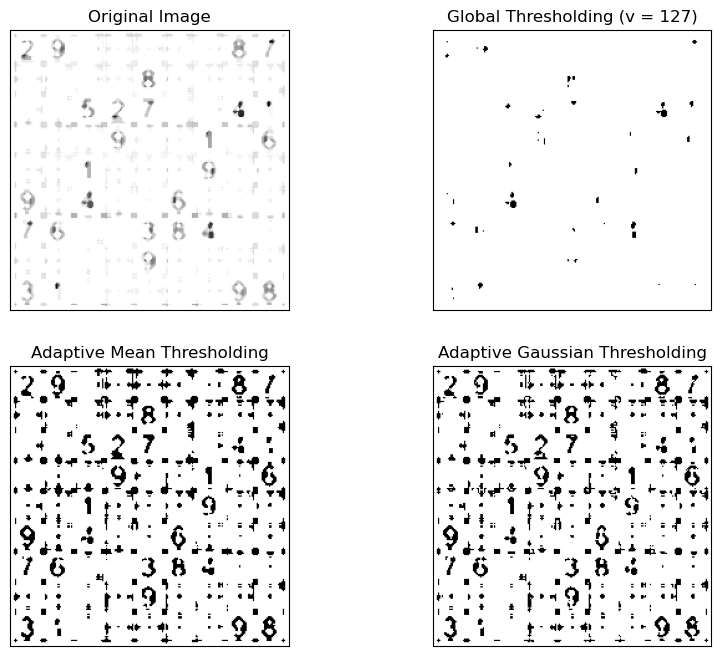

In [48]:
# Import necessary libraries
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load the image in grayscale
img = cv.imread(r'D:\FPT_Material\Sem 4\CPV301\Source for PE\Image\sudoku3.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# Apply median blur to reduce noise
img = cv.medianBlur(img,5)
 
# Apply different thresholding techniques
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
 
# Display the original and thresholded images
plt.figure(figsize=(10, 8))
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#### ✅ 3.3. Otsu’s Thresholding

##### 📌 Problem  
How do we choose the **best global threshold value automatically**?

##### 💡 Solution  
**Otsu’s method** finds the **optimal global threshold** by **minimizing intra-class variance** based on the image histogram.

It works particularly well for **bimodal images** — where the histogram has two distinct peaks.


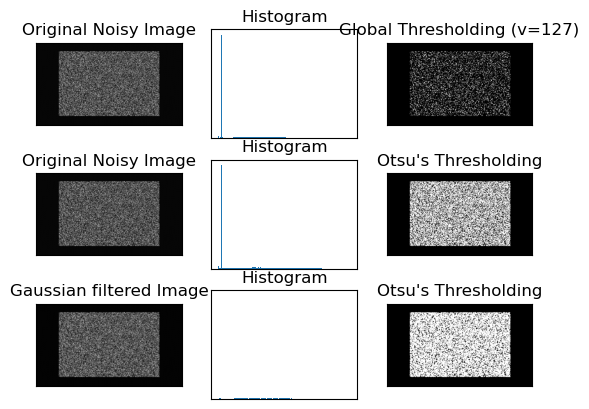

In [50]:
img = cv.imread(r'D:\FPT_Material\Sem 4\CPV301\Source for PE\Image\noisy.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read"

# Global thresholding
ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Otsu's thresholding
ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Display results
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding (v=127)',
          'Original Noisy Image', 'Histogram', "Otsu's Thresholding",
          'Gaussian filtered Image', 'Histogram', "Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3, 3, i*3 + 1), plt.imshow(images[i*3], 'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i*3 + 2), plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i*3 + 3), plt.imshow(images[i*3+2], 'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


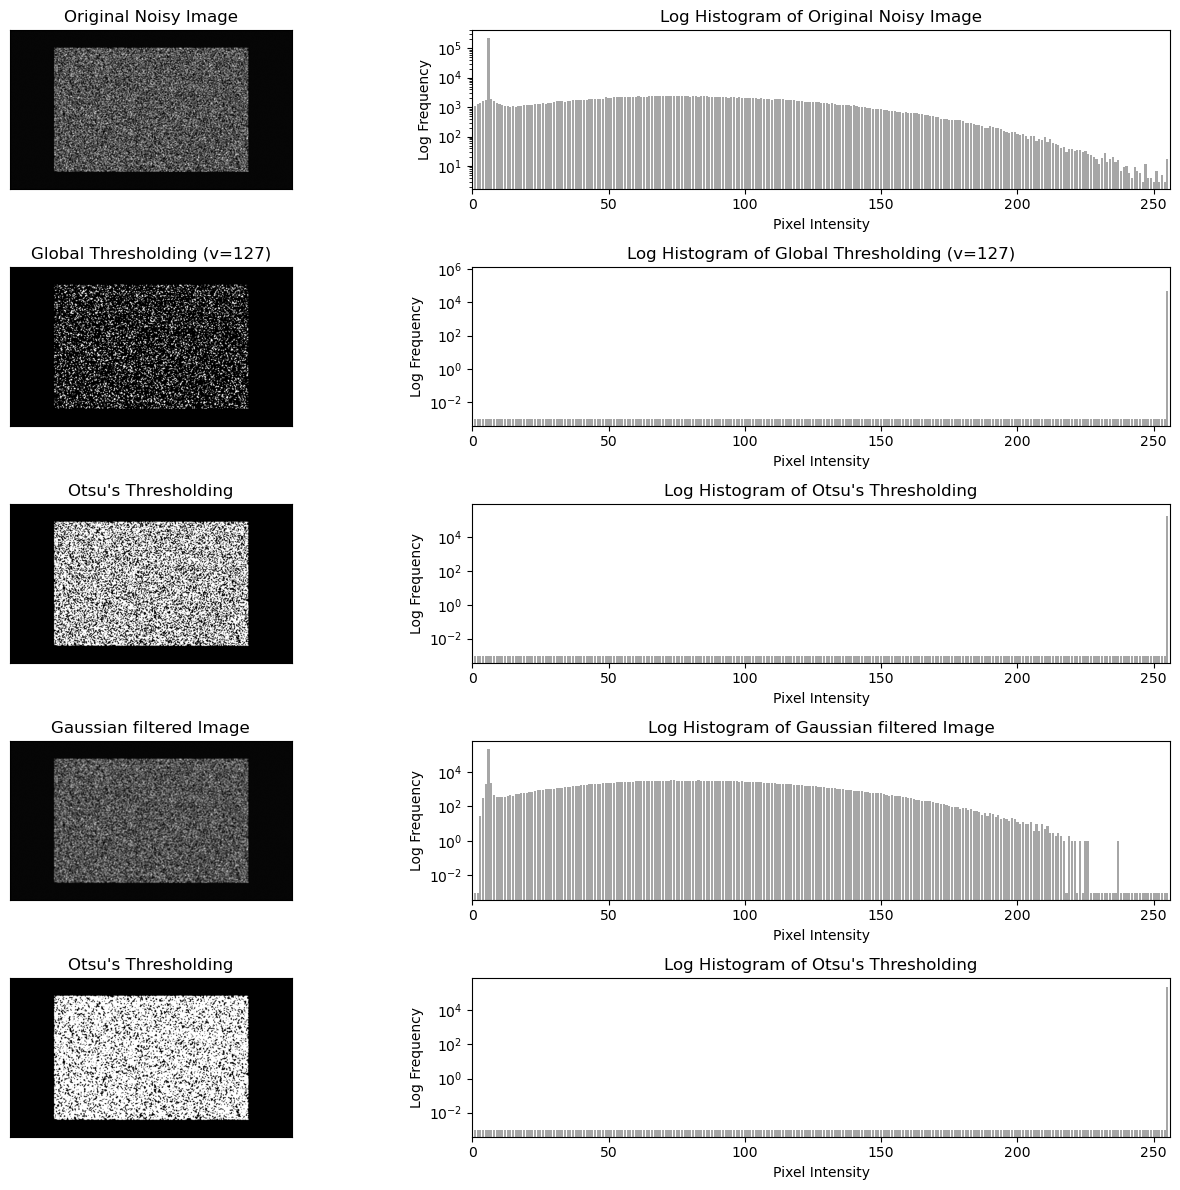

In [ ]:
# Load the image in grayscale
img = cv.imread(r'D:\FPT_Material\Sem 4\CPV301\Source for PE\Image\noisy.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read"

# Global thresholding
ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Otsu's thresholding
ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Display results
images = [img, th1, th2, blur, th3]
titles = [
    'Original Noisy Image', 'Global Thresholding (v=127)', "Otsu's Thresholding",
    'Gaussian filtered Image', "Otsu's Thresholding"
]

plt.figure(figsize=(14, 12))
for i in range(5):
    # Show image
    plt.subplot(5, 2, i*2 + 1)
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

    # Show log-scaled histogram (add small value to avoid log(0))
    plt.subplot(5, 2, i*2 + 2)
    hist = cv2.calcHist([images[i]], [0], None, [256], [0, 256])
    plt.bar(np.arange(256), hist[:,0] + 1e-3, color='gray', alpha=0.7)
    plt.title(f'Log Histogram of {titles[i]}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Log Frequency')
    plt.xlim([0, 256])
    plt.yscale('log')

plt.tight_layout()
plt.show()

### 🔬 How Does Otsu’s Binarization Work?

Otsu’s algorithm finds a threshold  $t$ that **minimizes the within-class variance**:

$$
\sigma_w^2(t) = q_1(t) \cdot \sigma_1^2(t) + q_2(t) \cdot \sigma_2^2(t)
$$

Where:

-  $q_1(t), q_2(t)$ : probabilities of the two classes  
-  $\sigma_1^2(t), \sigma_2^2(t)$ : variances of the two classes

The algorithm searches over all  $t \in$ [1, 255]  and selects the one that **minimizes**  $\sigma_w^2(t)$ .


In [ ]:
# ---- Manual Otsu's Thresholding Implementation ----

# Load the image in grayscale
img = cv.imread(r'D:\FPT_Material\Sem 4\CPV301\Source for PE\Image\noisy.jpg', cv.IMREAD_GRAYSCALE)
blur = cv.GaussianBlur(img, (5, 5), 0)

# Calculate histogram and cumulative distribution function (CDF)
hist = cv.calcHist([blur], [0], None, [256], [0, 256])
hist_norm = hist.ravel() / hist.sum()
Q = hist_norm.cumsum()

# Initialize variables for Otsu's method
bins = np.arange(256)
fn_min = np.inf
thresh = -1

# Iterate through all possible thresholds
# Note: Otsu's method considers thresholds from 1 to 255
for i in range(1, 256):
    p1, p2 = np.hsplit(hist_norm, [i]) # Split histogram into two parts
    q1, q2 = Q[i], Q[255] - Q[i] # Cumulative probabilities for the two classes

    # Skip if either class has negligible probability
    if q1 < 1.e-6 or q2 < 1.e-6:
        continue

    b1, b2 = np.hsplit(bins, [i]) # Split bins into two parts
    m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2 # Calculate class means
    v1 = np.sum(((b1 - m1) ** 2) * p1) / q1 # Variance of class 1
    v2 = np.sum(((b2 - m2) ** 2) * p2) / q2 # Variance of class 2

    fn = v1 * q1 + v2 * q2 # Within-class variance

    # Update minimum variance and threshold if current is lower
    # Note: Otsu's method minimizes the within-class variance
    if fn < fn_min:
        fn_min = fn
        thresh = i

# Confirm with OpenCV's built-in function
ret, otsu = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print("Manual Threshold:", thresh, "| OpenCV Otsu Threshold:", ret)

Manual Threshold: 54 | OpenCV Otsu Threshold: 53.0


### 4️⃣ Contrast Stretching

Also called normalization. Maps pixel values from a limited range (e.g., 50–150) to the full range (0–255), improving global contrast.



In [56]:
def contrast_stretching(grayscale_img):
    """Linearly stretches pixel intensity values to range 0–255."""
    return cv2.normalize(grayscale_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

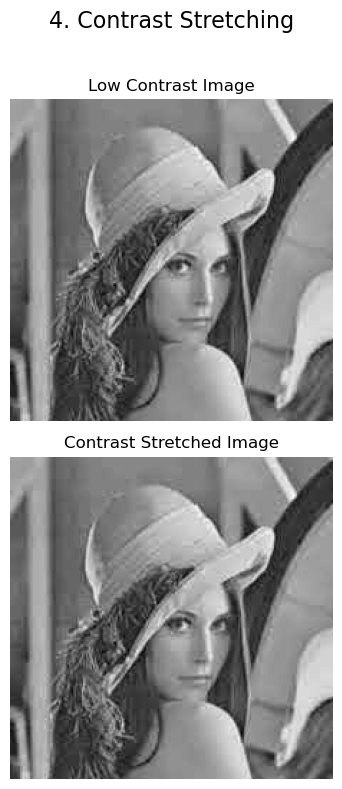

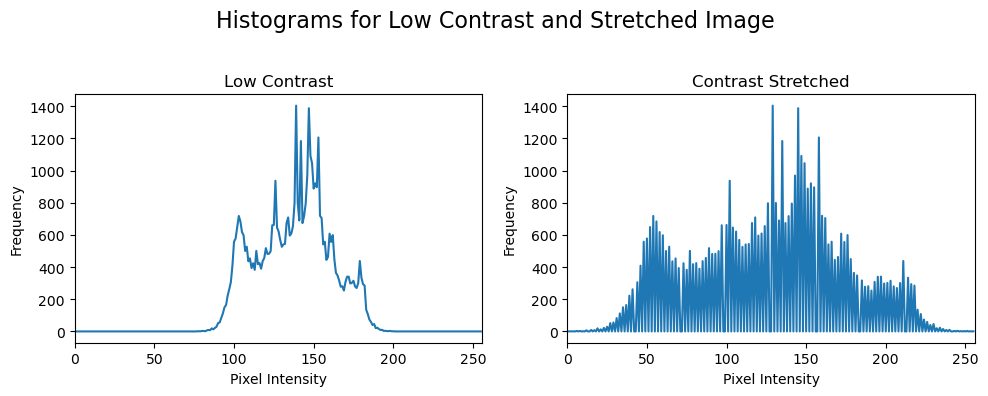

In [59]:
# Load low contrast image
low_contrast_img = cv.imread(r'D:\FPT_Material\Sem 4\CPV301\Source for PE\Image\low_contrast_image2.png', cv.IMREAD_GRAYSCALE)
assert low_contrast_img is not None, "file could not be read"

# Apply contrast stretching
stretched_img = contrast_stretching(low_contrast_img)

# Display the original and stretched images
show_images({
    "Low Contrast Image": low_contrast_img,
    "Contrast Stretched Image": stretched_img
}, "4. Contrast Stretching")

# Display histograms for both images
show_histograms({
    "Low Contrast": low_contrast_img,
    "Contrast Stretched": stretched_img
}, "Histograms for Low Contrast and Stretched Image")